# MST Vincolato
Dato un grafo non orientato e non completo, e dato un nodo r, si determini l’albero di copertura di radice r che minimizza il numero di figli di ogni nodo -1 (dato un albero di copertura, orientato a partire dalla radice, ogni nodo i non foglia ha ki ≥ 1 figli. Si minimizza la somma su tutti i nodi i non foglia di ki-1)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

* inizializza grafo e strutture
    * 
* crea una soluzione ammissibile (es. con Kruskal)
* Migliora e imponi i vincoli con ricerca locale
    * aggiungi un arco all'MST
    * rimuovi un arco del ciclo che si è venuto a creare
    * calcola la nuova funzione obiettivo
        * pensa a fattori di penalizzazione per nodi con + figli?
    * ripeti :)
* 

### Inizializzazione

In [2]:
MAX_NODES = 6

# TODO importa grafo da file

# Grafo di test
G = nx.Graph()
G.add_nodes_from([
    x for x in range(1, MAX_NODES+1)
])

G.add_edges_from([
    (x,y) for x in range(1, MAX_NODES+1)
          for y in range(x+1, MAX_NODES+1)
])

# Rendiamo il grafo non completo
G.remove_edges_from([
    (1,4), (3,6), (5,3), (4,5)
])


In [3]:
# Alcune funzioni di supporto

def draw_graph(graph, MST=nx.empty_graph(), root_node=None):
    # adapted from:
    # https://stackoverflow.com/questions/60164893/highlighting-certain-nodes-edges-in-networkx-issues-with-using-zip

    #nx.draw_shell(graph, with_labels=True, font_weight='bold')
    #nx.draw_shell(MST, with_labels=True, font_weight='bold', edge_color='red')
    
    # Get position using spring layout
    #pos = nx.spring_layout(graph, seed=1234)
    pos = nx.circular_layout(graph)

    # Get MST path
    path_edges = list(MST.edges)


    # Draw nodes and edges not included in the MST path
    #nx.draw_networkx_nodes(graph, pos, nodelist=set(graph.nodes)-set(MST.nodes))
    nx.draw_networkx_nodes(graph, pos, nodelist=graph.nodes)
    nx.draw_networkx_edges(graph, pos, edgelist=set(graph.edges)-set(path_edges), edge_color='grey', connectionstyle='arc3, rad = 0.3')

    # Draw MST path
    # highlight the root node
    if root_node != None:
        nx.draw_networkx_nodes(graph, pos, nodelist=[root_node], node_color='yellow')

    nx.draw_networkx_edges(graph,pos,edgelist=path_edges, edge_color='r', connectionstyle='arc3, rad = 0.3')

    # Draw labels
    nx.draw_networkx_labels(graph,pos)



In [4]:
# Funzione obiettivo

def cost(MST, root_node):

    visited = {}
    next = [root_node]
    
    cost = 0

    while len(next) > 0:
        node = next.pop(0)
        k_children = MST.degree(node) # 0 archi uscenti se node è foglia
                    
        if k_children > 1:
            cost += k_children - 1
        
    return cost


node 1 has 2 children
node 2 has 4 children
node 3 has 1 children
node 5 has 1 children
node 6 has 1 children
node 4 has 1 children
cost:  1


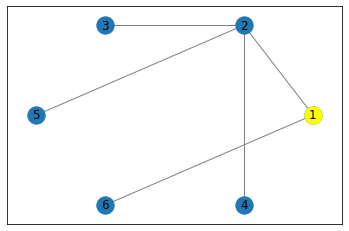

In [5]:
# TEST children nodes
TEST = nx.Graph()
TEST.add_edges_from([(1, 2), (2, 3), (2, 5), (1, 6), (2, 4)])

TEST_ROOT = 1

draw_graph(TEST, root_node=TEST_ROOT)

for node in TEST.nodes:
        k_children = TEST.degree(node) # 0 archi uscenti se node è foglia
            
        print("node",node,"has",k_children,"children")

print("cost: ",cost(TEST, 1))

In [6]:
TEST.adj[1]



AtlasView({2: {}, 6: {}})

## Ricerca Locale
1) crea una soluzione ammissibile (es. con Kruskal)
2) Migliora e imponi i vincoli con ricerca locale
    * aggiungi un arco all'MST
    * rimuovi un arco del ciclo che si è venuto a creare
    * calcola la nuova funzione obiettivo
        * pensa a fattori di penalizzazione per nodi con + figli?
    * ripeti :)

In [7]:
# PARAMETRI
ROOT_NODE=1

In [8]:
next_visit = list(G.adj[ROOT_NODE])

print("next_visit = ",next_visit)

for n in list(G.adj[2]):
    next_visit.append(n)

print("next_visit = ",next_visit)

node = next_visit.pop(0) # pop()  = estrazione LIFO (STACK), 
                         # pop(0) = estrazione FIFO (CODA)
print("node =",node)
next_visit.insert(0, "ciao")
print("next_visit = ",next_visit)



[x for x in range(0,12) if x%2 == 0]


next_visit =  [2, 3, 5, 6]
next_visit =  [2, 3, 5, 6, 1, 3, 4, 5, 6]
node = 2
next_visit =  ['ciao', 3, 5, 6, 1, 3, 4, 5, 6]


[0, 2, 4, 6, 8, 10]

### 1. Creazione soluzione ammissibile

Parto da un MST subottimale ottenuto con la visita in ampiezza a partire dalla radice.

> TODO: Usare Kruskal/Prim e poi invertire gli archi entranti nel nodo radice per "raddrizzare" l'albero

In [9]:
# Creazione di MST ammissibile a partire dal nodo radice specificato
# tramite visita in ampiezza (così ho un punto di partenza volutamente poco buono)
def build_rooted_mst(graph, root_node):
    visited_nodes = set() # per evitare cicli
    next_visit = []

    MST = nx.DiGraph()

    #MST.add_node(n1) # non necessario, aggiunti in automatico con gli archi

    #next_visit = list(G.adj[root_node]) # inserisci i vicini del nodo di partenza

    next_visit.insert(0,root_node) # assicurati di partire dal nodo radice!
    #for n in next_visit:
    while len(next_visit) > 0:
        n = next_visit.pop(0)
        # processa un nodo solo se non è già stato visitato
        if n not in visited_nodes:
            visited_nodes.add(n)
            # aggiungi i suoi vicini non visitati alla lista/stack di visita
            unvisited_neighbourhood = [x for x in list(G.adj[n]) if x not in visited_nodes]
            #print("n = ",n)
            #print("unvisited_neighbourhood = ",unvisited_neighbourhood)
            #print("(before loop) next_visit = ",next_visit)
            # inserimento in testa -> depth first?
            next_visit = unvisited_neighbourhood + next_visit
            for neighbour in unvisited_neighbourhood:
                if neighbour not in MST.nodes:
                    #print("MST edge added: ", (n,neighbour))
                    MST.add_edge(n,neighbour)
            #print("(after loop) next_visit = ",next_visit) 
        #else:
            #print("n = ", n, "(ignored)")

                

    # ora facciamo lo stesso per gli altri nodi
    #nodes = graph.nodes
    #for n1 in nodes:
    #    for n2 in graph.neighbors(n1):
    #        if n2 not in visited_nodes:
    #            visited_nodes.append(n2)
    #            MST.add_edge(n1,n2)


    return MST

0) MST:  [(1, 2), (1, 3), (1, 5), (1, 6), (2, 4)] costo: -10


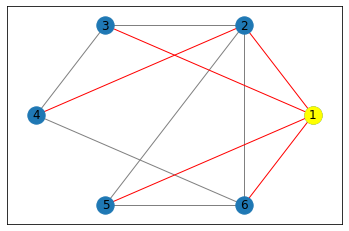

In [10]:
mst = build_rooted_mst(G, ROOT_NODE)
print("0) MST: ", mst.edges, "costo:", -10)
draw_graph(G, mst, ROOT_NODE)

### 2. Improvement

NON IN MST: [(2, 3), (2, 5), (2, 6), (3, 4), (4, 6), (5, 6)]
MST: [(1, 2), (1, 3), (1, 5), (1, 6), (2, 4)]

1 ) initial cost:  3
add:  (2, 3)
remove:  (1, 2, 'forward')
new cost:  2 (keep)

2 ) initial cost:  2
add:  (2, 5)
remove:  (1, 3, 'forward')
new cost:  1 (keep)

3 ) initial cost:  1
add:  (2, 6)
remove:  (1, 5, 'forward')
new cost:  0 (keep)

4 ) initial cost:  0
add:  (3, 4)
remove:  (2, 4, 'forward')
new cost:  0 (keep)

5 ) initial cost:  0
add:  (4, 6)
remove:  (2, 6, 'reverse')
new cost:  0 (keep)

6 ) initial cost:  0
add:  (5, 6)
remove:  (4, 6, 'reverse')
new cost:  0 (keep)


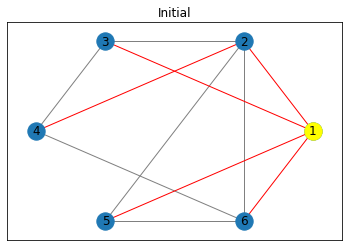

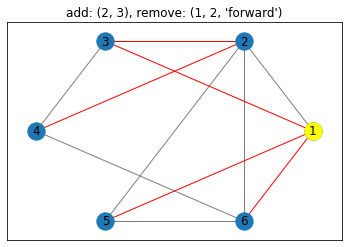

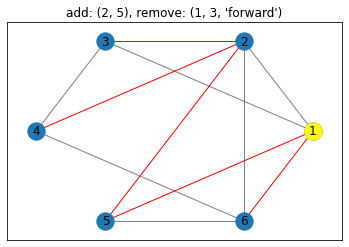

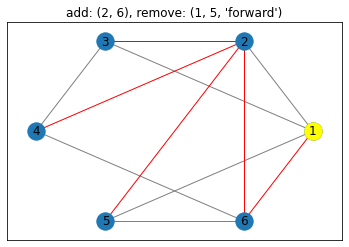

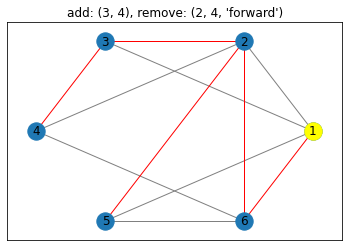

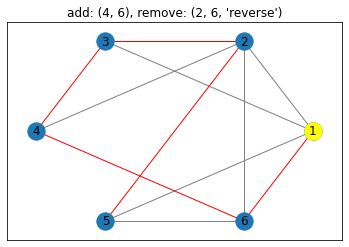

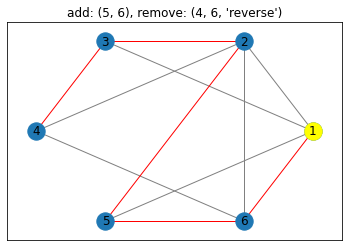

In [11]:
# CICLO DI MIGLIORAMENTO

# calcolo il complementare all'MST
outer_G = G.copy()
outer_G.remove_edges_from(mst.edges)

print("NON IN MST:", outer_G.edges)
print("MST:", mst.edges)

plt.figure(0)
plt.title("Initial")
draw_graph(G, mst, root_node=ROOT_NODE)

#draw_graph(outer_G, root_node=ROOT_NODE)


# aggiungo un arco all'MST
# ciò causerà la nascita di un ciclo nel grafo, perchè MST è sottinsieme massimale di archi senza cicli
# quindi elimino un arco del ciclo che si è venuto a creare <=> la funzione obiettivo migliora

candidates = list(outer_G.edges)
k = 1

### TEST
## PROVA 1 ITERAZIONE

new_e = candidates[4]    

for new_e in candidates:
    # prima di tutto calcolo il valore attuale di obj()
    cost_before = cost(mst, ROOT_NODE)
    print("")
    print(k,") initial cost: ",cost_before)

    print("add: ",new_e)
    mst.add_edges_from([new_e])

    # loop detection
    loop_edges = nx.algorithms.cycles.find_cycle(mst, orientation="ignore")


    # 1: eliminazione GREEDY dell'arco in più
    # scelgo la mossa che localmente mi da l'abbassamento minore di obj()
    for ce in loop_edges:
        #print(k,"MST=",mst.edges); 
        k+=1;
        mst.remove_edges_from([ce])
        fig = plt.figure(k)
        plt.title("add: {}, remove: {}".format(new_e, ce))
        draw_graph(G, mst, root_node=ROOT_NODE )
        cost_after = cost(mst, ROOT_NODE)
        print("remove: ", ce)

        if cost_after > cost_before:
            # annulla tutto e prova un altro candidato!
            mst.add_edges_from([ce])
            print("new cost: ",cost_after, "(revert)")
        else:
            # rendi la modifica permanente e passa oltre.
            # non esploro gli altri archi candidati perchè con una mossa del genere
            # il costo può essere ridotto solo di 1
            print("new cost: ",cost_after, "(keep)")
            break

    # se non ho trovato miglioramenti, 
    if cost_after > cost_before:
        print("No improvements, removing: ",new_e)
        mst.remove_edges_from([new_e])
        
        outer_G = G.copy()
        outer_G.remove_edges_from(mst.edges)

        candidates = list(outer_G.edges)



Costo finale:  0
MST =  [(1, 6), (2, 3), (2, 5), (3, 4), (5, 6)]
mst is tree:  True
mst loops:  None


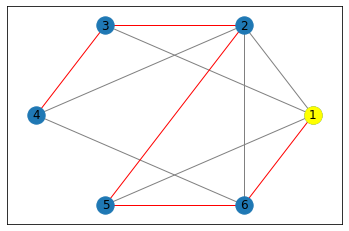

In [14]:
# PRINT RESULT
print("Costo finale: ", cost(mst, ROOT_NODE))
print("MST = ",mst.edges)
draw_graph(G, mst, ROOT_NODE)


print("---TEST AMMISSIBILITA'---")

print("mst is tree: ",nx.is_tree(mst))

try:
    cycletest = nx.algorithms.cycles.find_cycle(mst, orientation="ignore")
except:
    cycletest = False
finally:
    print("mst loops: ", cycletest)